In [54]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

filename="Real estate.csv"
df = pd.read_csv(filename)

# 🔍 EDA (Exploratory Data Analysis)

# Tổng quan dữ liệu

In [55]:
# Xem thuộc tính của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    float64
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [56]:
# Thống kê dữ liệu
df.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# 🔮 Modeling – Dự đoán *House price of unit area*

## a. Xây dựng mô hình hồi quy tuyến tính đơn biến

## Xem thử biến độc lập (cột nào) phù hợp nhất với cột Target ('House price of unit area')

In [57]:
print(df.corr()['House price of unit area'].sort_values(ascending=False))

House price of unit area               1.000000
Number of convenience stores           0.571005
Latitude                               0.546307
Longitude                              0.523287
Transaction date                       0.087491
House age                             -0.210567
Distance to the nearest MRT station   -0.673613
Name: House price of unit area, dtype: float64


* Ta thấy được cột **Number of convenience stores** có độ tương quan cao nhất với cột Target **House price of unit area**, nên sẽ lấy cột **Number of convenience stores** làm biến độc lập (X)

In [58]:
# Xem dữ liệu
df.head(5)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Data Preprocessing

In [59]:
#Lấy cột Target Y  và cột X
X = df[['Number of convenience stores']]
Y = df['House price of unit area']

In [60]:
#Phân chia tập dữ liệu
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 99)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 1)
(83, 1)
(331,)
(83,)


## Training a Linear Regression Model

In [61]:
lm = LinearRegression()

In [62]:
lm.fit(X_train, Y_train)

LinearRegression()

In [63]:
# In intercept (b0) 
print("Intercept (B0) = ",lm.intercept_)

# In hệ số (slope)
print("Slope (B1) = ", lm.coef_.ravel())


Intercept (B0) =  27.353913800133675
Slope (B1) =  [2.62280843]


This can quite literally be plugged in into our formula from before:
$$\text{price}=2.62280843*\text{Number of convenience stores}+27.3539138$$

## Making Predictions

In [64]:
# Predict
def calc(intercept,slope,number):
    return slope*number+ intercept
    
intercept = lm.intercept_
slope = lm.coef_.ravel()[0]
number = 2
price = calc(intercept,slope,number)
print(f"Predict price for {number} convenience stores: {price:.2f}")

Predict price for 2 convenience stores: 32.60


In [65]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[37.84514753 50.95918969 43.09076439 50.95918969 48.33638125 37.84514753
 37.84514753 29.97672223 43.09076439 32.59953066 35.2223391  43.09076439
 45.71357282 29.97672223 45.71357282 29.97672223 40.46795596 45.71357282
 40.46795596 27.3539138  43.09076439 32.59953066 37.84514753 43.09076439
 29.97672223 37.84514753 29.97672223 50.95918969 27.3539138  50.95918969
 29.97672223 29.97672223 43.09076439 35.2223391  27.3539138  40.46795596
 35.2223391  40.46795596 40.46795596 48.33638125 48.33638125 45.71357282
 43.09076439 40.46795596 40.46795596 29.97672223 50.95918969 29.97672223
 48.33638125 43.09076439 37.84514753 29.97672223 29.97672223 50.95918969
 50.95918969 37.84514753 48.33638125 45.71357282 29.97672223 43.09076439
 43.09076439 35.2223391  43.09076439 40.46795596 27.3539138  37.84514753
 48.33638125 27.3539138  37.84514753 29.97672223 27.3539138  27.3539138
 40.46795596 27.3539138  27.3539138  27.3539138  35.2223391  29.97672223
 32.59953066 45.71357282 40.46795596 50.95918969 32.

In [66]:
df_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': Y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
50     44.2  37.845148
99     62.2  50.959190
7      46.7  43.090764
390    38.6  50.959190
167    43.4  48.336381
..      ...        ...
324    31.3  32.599531
326    62.1  45.713573
142    37.5  40.467956
177    42.0  50.959190
15     50.5  32.599531

[83 rows x 2 columns]


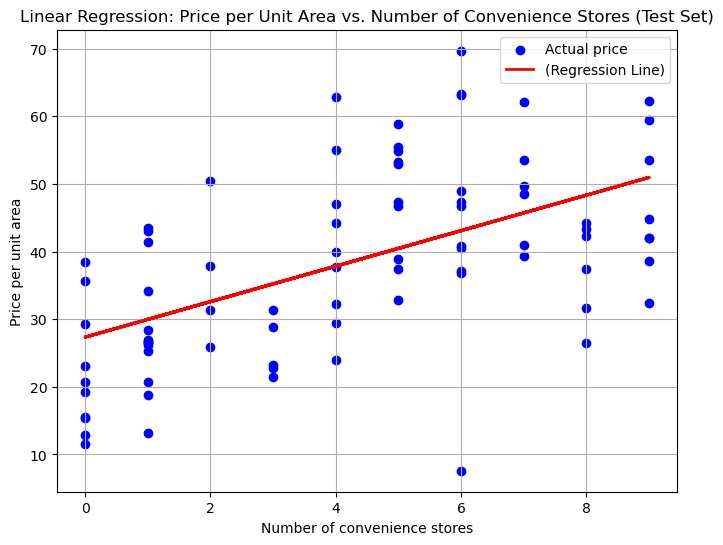

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, Y_test, color='blue', label='Actual price')
plt.plot(X_test,Y_pred, color='red', linewidth=2, label='(Regression Line)')
plt.xlabel('Number of convenience stores')
plt.ylabel('Price per unit area')
plt.title('Linear Regression: Price per Unit Area vs. Number of Convenience Stores (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
y_test, y_pred = Y_test.squeeze(), Y_pred.squeeze()
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("Mô hình đơn biến")
print(f"MAE = {MAE:.4f}")
print(f"MSE = {MSE:.4f}")
print(f"RMSE = {RMSE:.4f}")

Mô hình đơn biến
MAE = 9.3987
MSE = 131.0400
RMSE = 11.4473


In [69]:
# Residuals
residuals = y_test - y_pred

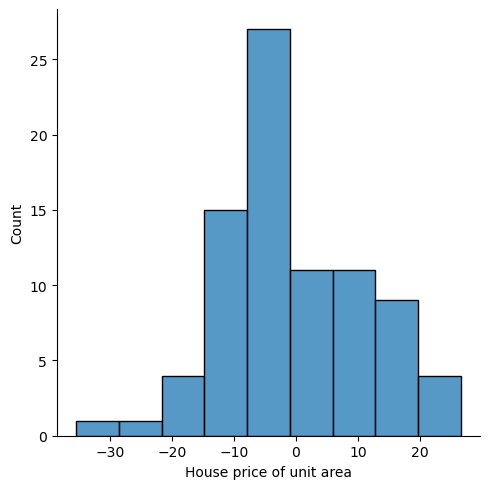

In [73]:
sns.displot(residuals)

## b Xây dựng mô hình hồi quy đa biến (House price ~ Distance to MRT, House age, Latitude/Longitude)

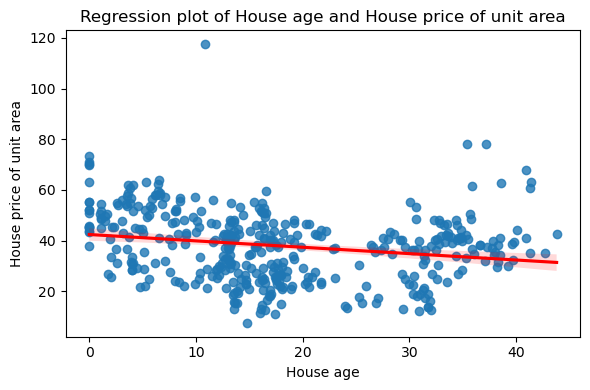

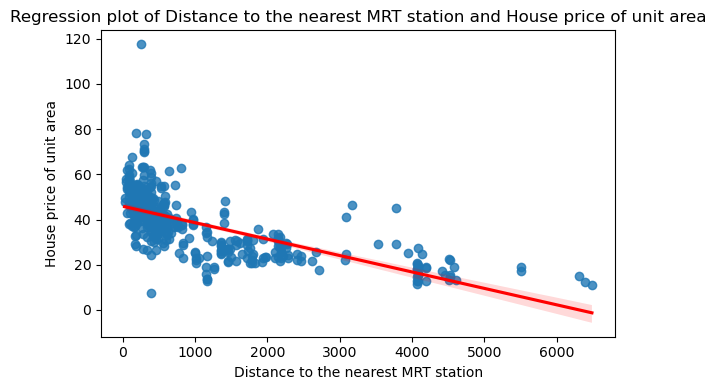

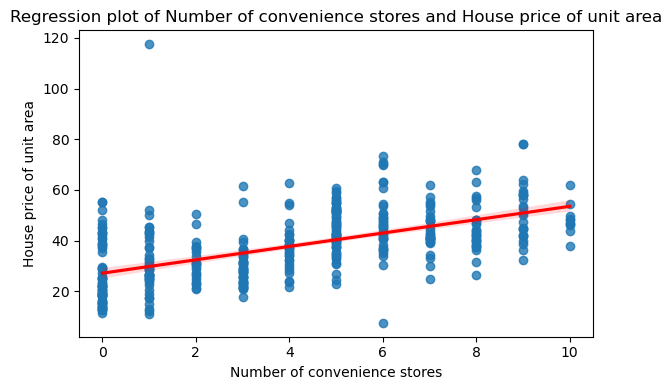

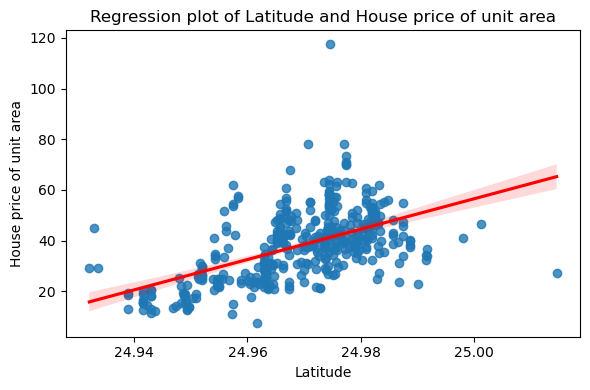

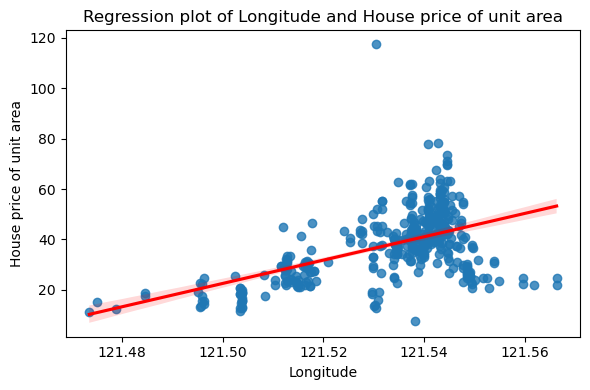

In [74]:
target =  'House price of unit area'
features = [
   'House age',	'Distance to the nearest MRT station',
    'Number of convenience stores','Latitude','Longitude'
]


for col in features:
    plt.figure(figsize=(6,4))
    sns.regplot(data=df, x=col, y=target, ci=95,line_kws={'color':'red'})
    plt.title(f"Regression plot of {col} and {target}")
    plt.xlabel(col); plt.ylabel(target)
    plt.tight_layout()
    plt.show()


In [75]:
X = df[features]
y = df[target]
#Chia train, test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 99)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
lm = LinearRegression()
lm.fit(X_train_scaled, Y_train)

# In intercept (b0) 
print("Intercept (B0) = ",lm.intercept_)

Intercept (B0) =  38.003625377644525


In [ ]:
Y_pred = lm.predict(X_test_scaled)

In [84]:
df_preds = pd.DataFrame({'Actual': Y_test.squeeze(), 'Predicted': Y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
50     44.2  40.229134
99     62.2  52.349292
7      46.7  45.418152
390    38.6  43.377263
167    43.4  44.195836
..      ...        ...
324    31.3  33.200962
326    62.1  46.962228
142    37.5  40.484886
177    42.0  45.386348
15     50.5  35.475991

[83 rows x 2 columns]


In [85]:
# ghép thành DataFrame
coef = lm.coef_.ravel()
coefficients_df = pd.DataFrame(
    {"Coefficient value": coef},
    index=features
).round(6)

print(coefficients_df)

                                     Coefficient value
House age                                    -3.079964
Distance to the nearest MRT station          -5.371785
Number of convenience stores                  3.640598
Latitude                                      2.731880
Longitude                                    -0.179572


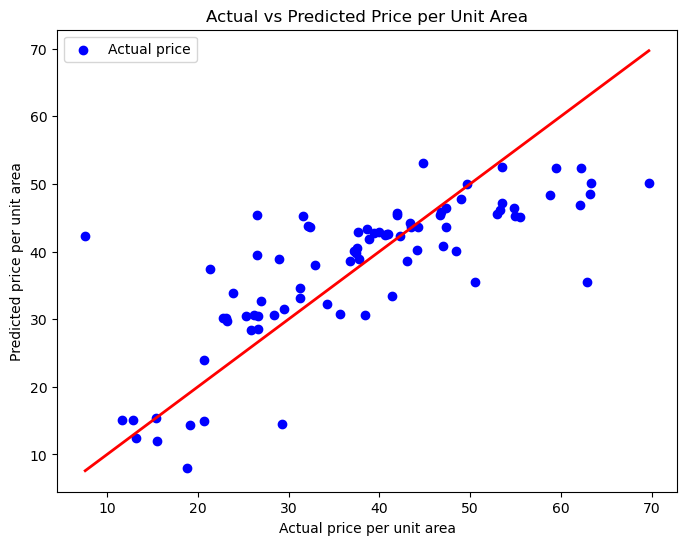

In [89]:
#Vẽ đồ thị cho đa biến thì dùng y_test, y_pred
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue', label='Actual price')
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', linewidth=2)

plt.xlabel('Actual price per unit area')
plt.ylabel('Predicted price per unit area')
plt.title('Actual vs Predicted Price per Unit Area')
plt.legend()


In [91]:
y_test, y_pred = Y_test.squeeze(), Y_pred.squeeze()
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Mô hình đa biến")
print(f"MAE = {MAE:.4f}")
print(f"MSE = {MSE:.4f}")
print(f"RMSE = {RMSE:.4f}")


Mô hình đa biến
MAE = 6.4771
MSE = 78.9734
RMSE = 8.8867


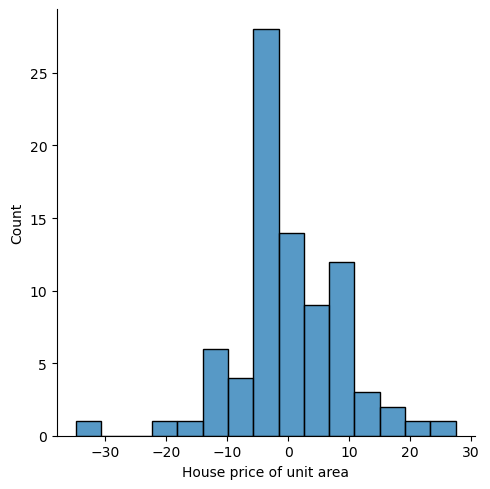

In [92]:
# Residuals
residuals = y_test - y_pred
sns.displot(residuals)

### Nhận xét

Đơn biến (stores → price): MAE 9.40, RMSE 11.45 → chỉ bắt xu hướng nhẹ, sai số khá lớn.

Đa biến (Age, Distance MRT, Stores, Lat, Long – có chuẩn hoá): MAE 6.48, RMSE 8.89 → tốt hơn rõ.

Mức cải thiện:

* MAE ↓ 31% (9.40 → 6.48)

* RMSE ↓ 22% (11.45 → 8.89)

* MSE ↓ ~40%

Dấu & độ mạnh hệ số (trên thang chuẩn hoá):
Distance to MRT − mạnh (xa MRT giá giảm), House age − (nhà cũ giá giảm), Stores + (tiện ích tăng giá), Latitude hơi +, Longitude nhẹ −.

Residuals: đa biến tập trung quanh 0 hơn → mô hình hợp lý hơn.

Kết luận: sử dụng mô hình đa biến cho kết quả dự đoán chính xác hơn so với đa biến